In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import wfdb

In [2]:
import seaborn as sns
sns.set("paper")

In [3]:
# df = pd.read_csv("./data/sample_data.csv")
signal, fields = wfdb.rdsamp("./mitdb/100")
ann = wfdb.rdann("./mitdb/100","atr")
ann_index = ann.sample
ann_values = ann.symbol

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [5]:
## low pass and high pass filters

from scipy.signal import butter, lfilter #Import the extra module required
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

iltered = butter_lowpass_filter(signal[:,1][0:8000], 15, 360, 5)#filter the signal with a cutoff at 40Hz and a 5th order Butterworth filter

## Doing for per beats

In [6]:
normal_beats = []
for i in ann_index:
    normal_beats.append(signal[:,1][i-120:i+130])

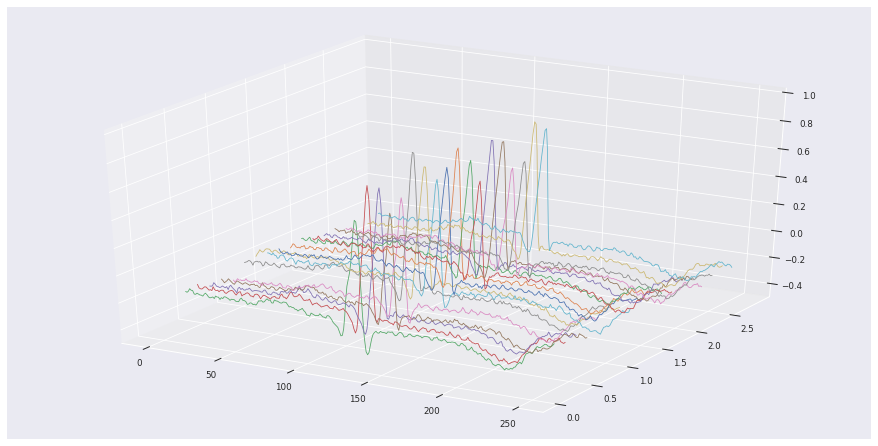

In [16]:
%matplotlib inline
%matplotlib inline

fig = plt.figure(figsize=(12,6))
plt.axis("off")
ax = Axes3D(fig)
for i in range(20):
    ax.plot([j for j in range(len(normal_beats[i]))],[0.15 * i for j in range(len(normal_beats[i]))],normal_beats[i], linewidth=0.8)
plt.show()